<a href="https://colab.research.google.com/github/keerthanakkumar/stock-predictor/blob/main/Stati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT LIBRARIES**

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## **GATHER DATA**

In [26]:
start='2012-01-01'
end='2022-12-21'
stock1 = 'GOOG'   # google
stock2 = 'TSLA'   # tesla
stock3 = 'MSFT'   # microsoft
stock4 = 'AMZN'   # amazon
data1=yf.download(stock1 ,start,end)
data2=yf.download(stock2 ,start,end)
data3=yf.download(stock3 ,start,end)
data4=yf.download(stock4 ,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
# setting graph format
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20,9)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['lines.linewidth'] = 2

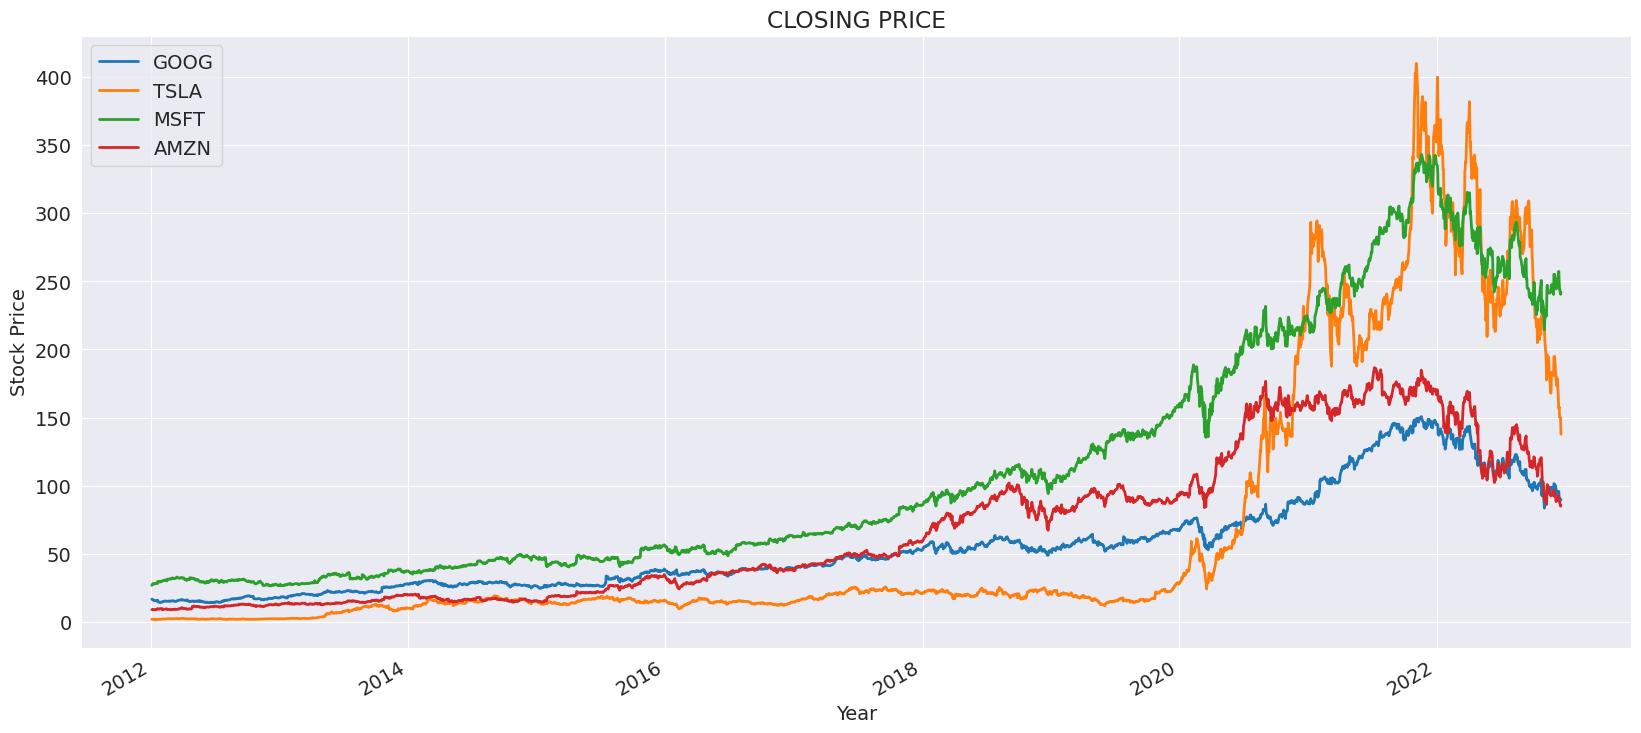

In [28]:
# plotting close price
data1['Close'].plot(label=stock1)
data2['Close'].plot(label=stock2)
data3['Close'].plot(label=stock3)
data4['Close'].plot(label=stock4)

plt.title('CLOSING PRICE')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()

In [29]:
## Calculate Daily returns
data1['returns'] = (data1['Close']/data1['Close'].shift(1))-1
data2['returns'] = (data2['Close']/data2['Close'].shift(1))-1
data3['returns'] = (data3['Close']/data3['Close'].shift(1))-1
data4['returns'] = (data4['Close']/data4['Close'].shift(1))-1

<ipython-input-30-d667057aac4e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['returns'], hist = False, color = 'b' ,label=stock1)
<ipython-input-30-d667057aac4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['returns'], hist = False, color = 'r' ,label=stock2

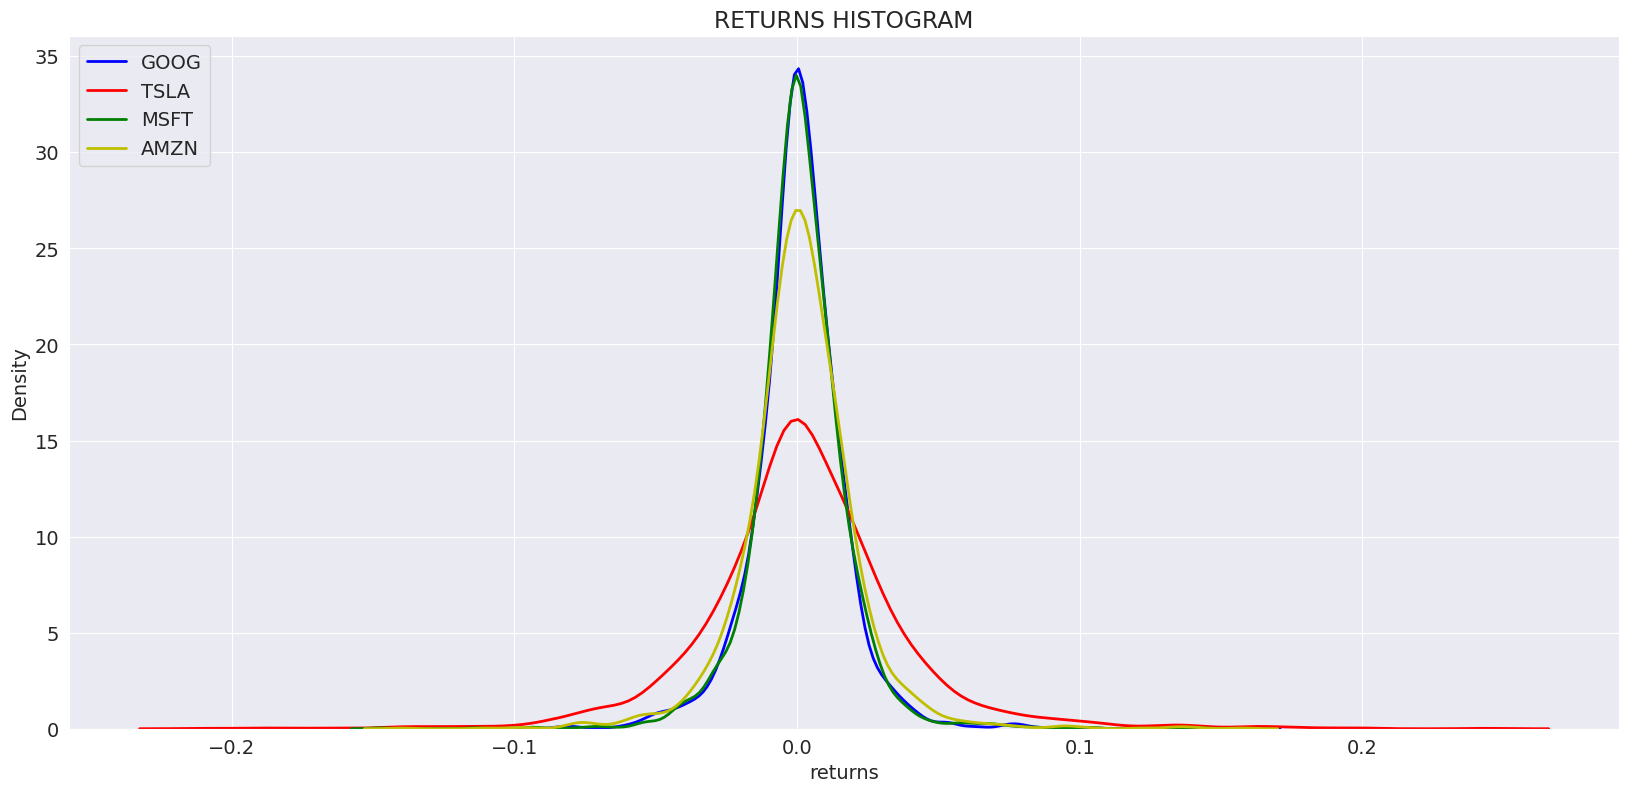

In [30]:
## histogram distribution of daily returns for all the stock
sns.distplot(data1['returns'], hist = False, color = 'b' ,label=stock1)
sns.distplot(data2['returns'], hist = False, color = 'r' ,label=stock2)
sns.distplot(data3['returns'], hist = False, color = 'g' ,label=stock3)
sns.distplot(data4['returns'], hist = False, color = 'y' ,label=stock4)

plt.title('RETURNS HISTOGRAM')
plt.legend(loc='upper left')
plt.show()

In [31]:
## Calculate the Mean and Variances of Daily returns
print('Stock '+ stock1 + ' Mean:', data1['returns'].mean())
print('Stock '+ stock1 + ' Variances:', data1['returns'].var())

print('Stock '+ stock2 + ' Mean:', data2['returns'].mean())
print('Stock '+ stock2 + ' Variances:', data2['returns'].var())

print('Stock '+ stock3 + ' Mean:', data3['returns'].mean())
print('Stock '+ stock3 + ' Variances:', data3['returns'].var())

print('Stock '+ stock4 + ' Mean:', data4['returns'].mean())
print('Stock '+ stock4 + ' Variances:', data4['returns'].var())

Stock GOOG Mean: 0.0007530298664640208
Stock GOOG Variances: 0.00028379112371411283
Stock TSLA Mean: 0.0021922710816106275
Stock TSLA Variances: 0.001274673651697888
Stock MSFT Mean: 0.0009377556547974902
Stock MSFT Variances: 0.00028011353541396226
Stock AMZN Mean: 0.0010254355552889991
Stock AMZN Variances: 0.00041964505788631847


In [32]:
## Stock with highest probability of profit with 2% or more
# cdf - cumulative distribution function
# norm - guassion(normal) distribution
# z- val for which u have to find cumulative probability
stock1_profit = stats.norm.cdf(0.02,
             loc=data1['returns'].mean(),
             scale=data1['returns'].std())

print(stock1 + " probability of profit:", round(stock1_profit, 2))

stock2_profit = stats.norm.cdf(0.02,
             loc=data2['returns'].mean(),
             scale=data2['returns'].std())

print(stock2 + " probability of profit:", round(stock2_profit, 2))

stock3_profit = stats.norm.cdf(0.02,
             loc=data3['returns'].mean(),
             scale=data3['returns'].std())

print(stock3 + " probability of profit:", round(stock3_profit, 2))

stock4_profit = stats.norm.cdf(0.02,
             loc=data4['returns'].mean(),
             scale=data4['returns'].std())

print(stock4 + " probability of profit:", round(stock4_profit, 2))

GOOG probability of profit: 0.87
TSLA probability of profit: 0.69
MSFT probability of profit: 0.87
AMZN probability of profit: 0.82


In [33]:
## Stock with highest probability of loss with 2% or more

stock1_loss = stats.norm.cdf(-0.02,
             loc=data1['returns'].mean(),
             scale=data1['returns'].std())

print(stock1 + " probability of loss:", round(stock1_loss, 2))

stock2_loss = stats.norm.cdf(-0.02,
             loc=data2['returns'].mean(),
             scale=data2['returns'].std())

print(stock2 + " probability of loss:", round(stock2_loss, 2))

stock3_loss = stats.norm.cdf(-0.02,
             loc=data3['returns'].mean(),
             scale=data3['returns'].std())

print(stock3 + " probability of loss:", round(stock3_loss, 2))

stock4_loss = stats.norm.cdf(-0.02,
             loc=data4['returns'].mean(),
             scale=data4['returns'].std())

print(stock4 + " probability of loss:", round(stock4_loss, 2))

GOOG probability of loss: 0.11
TSLA probability of loss: 0.27
MSFT probability of loss: 0.11
AMZN probability of loss: 0.15


In [34]:
## Monthly Returns
Stock1_Monthly = data1.asfreq('M').ffill()
Stock2_Monthly = data2.asfreq('M').ffill()
Stock3_Monthly = data3.asfreq('M').ffill()
Stock4_Monthly = data4.asfreq('M').ffill()

In [35]:
## Calculate the Mean and Variances of Monthly returns
print('Monthly Returns of ' + stock1)
print(' Mean:', Stock1_Monthly['returns'].mean())
print(' Variances:', Stock1_Monthly['returns'].var())

print('Monthly Returns of ' + stock2)
print(' Mean:', Stock2_Monthly['returns'].mean())
print(' Variances:', Stock2_Monthly['returns'].var())

print('Monthly Returns of ' + stock3)
print(' Mean:', Stock3_Monthly['returns'].mean())
print(' Variances:', Stock3_Monthly['returns'].var())

print('Monthly Returns of ' + stock4)
print(' Mean:', Stock4_Monthly['returns'].mean())
print(' Variances:', Stock4_Monthly['returns'].var())

Monthly Returns of GOOG
 Mean: -0.0029224165576921405
 Variances: 0.00023037852965301315
Monthly Returns of TSLA
 Mean: 0.0029906682562865034
 Variances: 0.0006869726636329269
Monthly Returns of MSFT
 Mean: -0.0006628727063206577
 Variances: 0.00016343773212902006
Monthly Returns of AMZN
 Mean: 0.0017561032767396667
 Variances: 0.00044863197897025714


In [36]:
# concatenate returns
returns_gained = pd.concat([data1['returns'],data2['returns'],data3['returns'],data4['returns']],axis=1)
returns_gained.columns = [stock1,stock2,stock3,stock4]

In [37]:
# volatility of stocks
volatility = returns_gained.std()
volatility

GOOG    0.016846
TSLA    0.035703
MSFT    0.016737
AMZN    0.020485
dtype: float64

In [38]:
max_vol = volatility.idxmax()
min_vol = volatility.idxmin()
print('Most Volatile stock is: ',max_vol)
print('Least Volatile stock is: ',min_vol)

Most Volatile stock is:  TSLA
Least Volatile stock is:  MSFT


In [39]:
# correlation
returns_gained.corr()

,GOOG,TSLA,MSFT,AMZN
GOOG,1.000000,0.349430,0.665835,0.607438
TSLA,0.349430,1.000000,0.363124,0.358051
MSFT,0.665835,0.363124,1.000000,0.571009
AMZN,0.607438,0.358051,0.571009,1.000000


<Axes: >

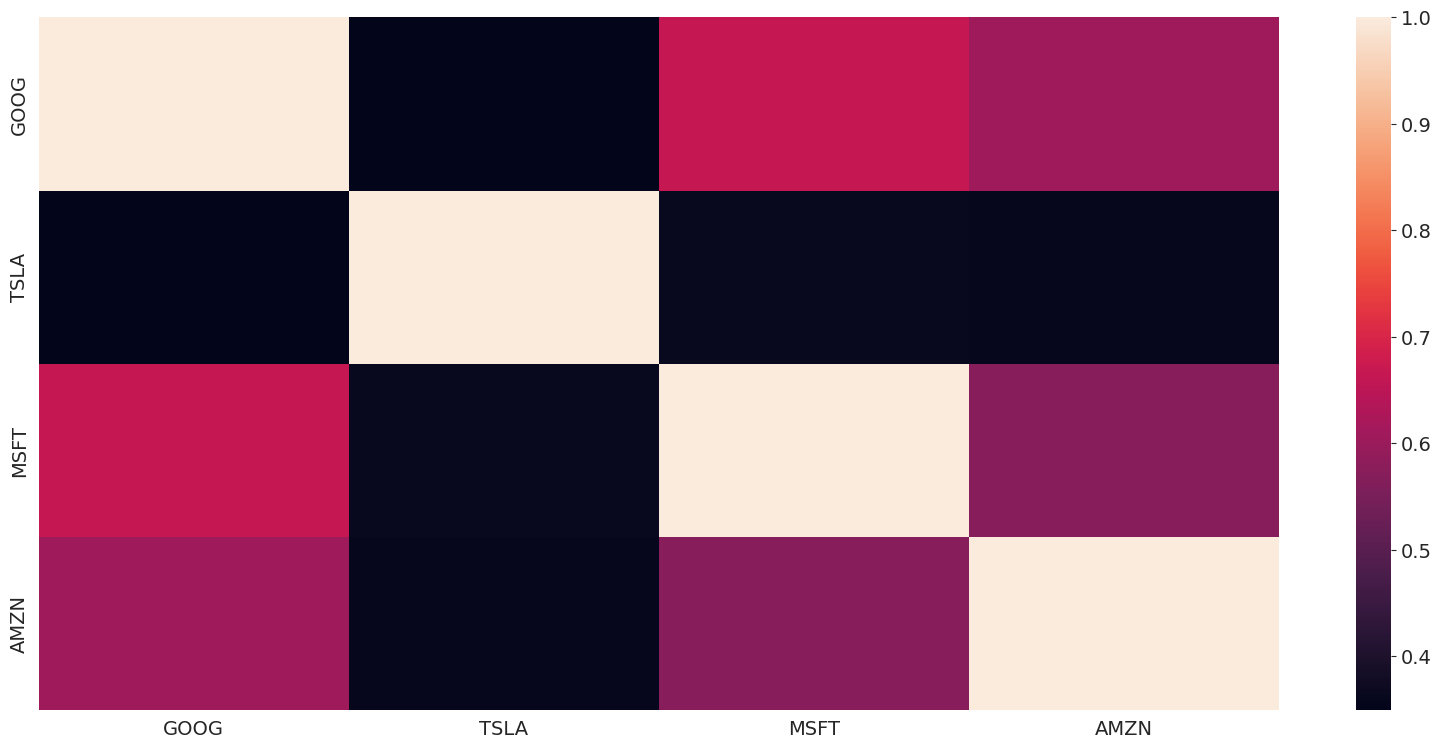

In [40]:
# Heatmap
sns.heatmap(returns_gained.corr())

<Axes: >

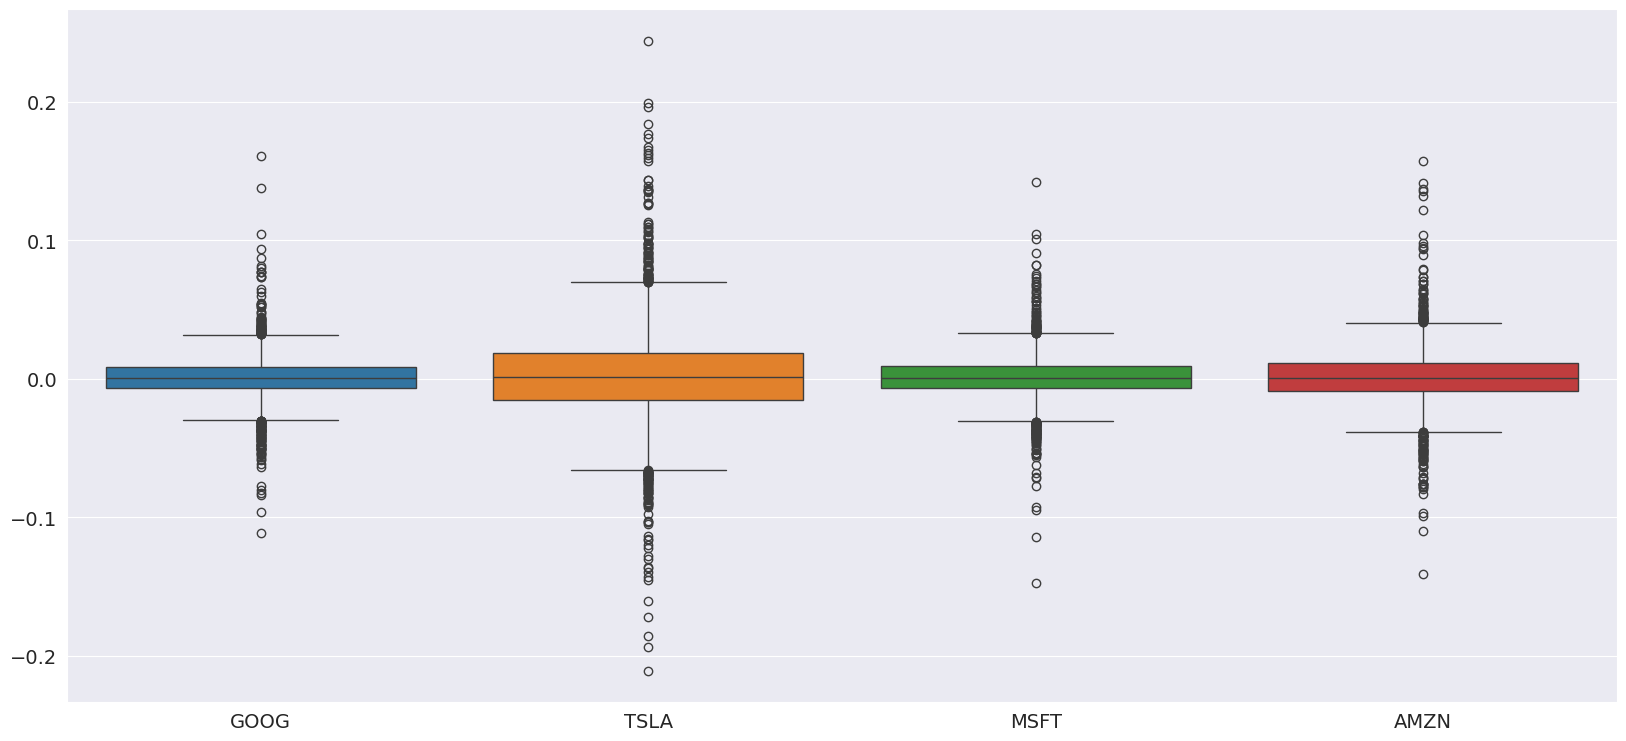

In [41]:
# boxplot
sns.boxplot(returns_gained)

we do not remove the outliers as it will make a change in data and prediction